## Notes

* Guys I see Motreal has very few businesses and few reviews. You can see that at the histograms. Probably we should consider changing or at least take that into account for our analysis - Andreas
* Changed the cities to have enough businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import re

In [2]:
business_df= pd.read_csv("data/csv/yelp_academic_dataset_business.csv")
#business_df.info()

In [3]:
city1="Las Vegas"
city2="Toronto"
city3="Phoenix"

print("Number of Businesses")

print(city1,":",len(business_df[business_df.city==city1]))
print(city2,":",len(business_df[business_df.city==city2]))
print(city3,":",len(business_df[business_df.city==city3]))

Number of Businesses
Las Vegas : 22892
Toronto : 14540
Phoenix : 14468


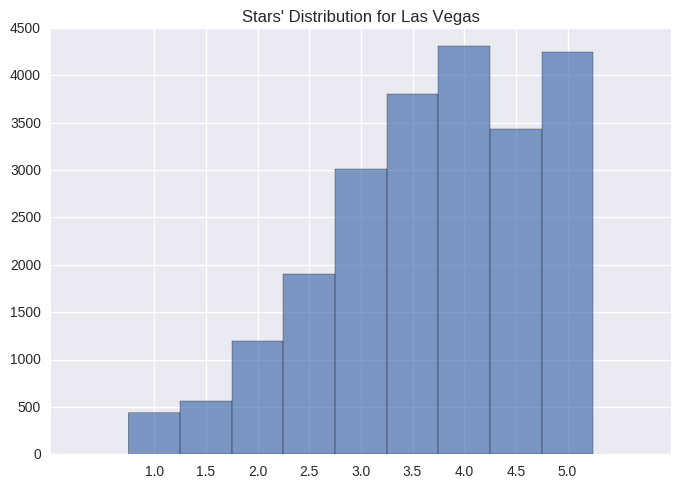

In [4]:
LV = business_df[business_df.city == city1]

n_total, bins, patch = plt.hist(LV.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for Las Vegas")
plt.show()

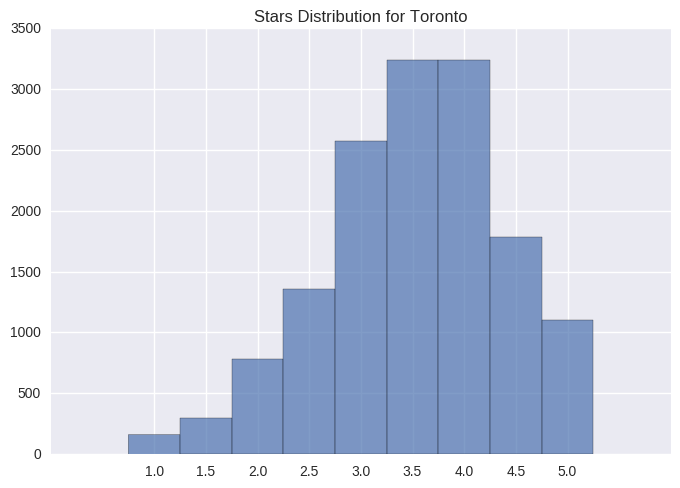

In [5]:
Toronto = business_df[business_df.city ==city2]

n_total, bins, patch = plt.hist(Toronto.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for Toronto")
plt.show()

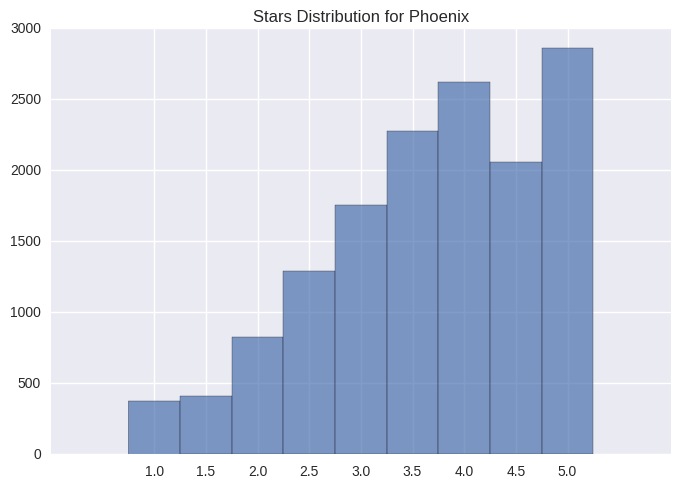

In [6]:
Phoenix = business_df[business_df.city == city3]

n_total, bins, patch = plt.hist(Phoenix.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for Phoenix")

plt.show()

In [7]:
stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(LV.stars)),
                                     city2:list(scipy.stats.describe(Toronto.stars)),
                                     city3:list(scipy.stats.describe(Phoenix.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,22892,14468,14540
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.69843,3.67238,3.51575
variance,1.02516,1.12533,0.758642
skewness,-0.567735,-0.57248,-0.400705
kurtosis,-0.318652,-0.414378,-0.093702


In [8]:
print("There are",len(business_df[business_df.categories.isnull()]),"businesses that have no business category")

There are 325 businesses that have no business category


In [9]:
diff_categories=[]
for i in business_df[business_df.categories.notnull()].categories:
    
    current_category=re.findall(r"[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+",i)
    diff_categories+=current_category

diff_categories=set(diff_categories)

#for category in diff_categories:
    #business_df[category]=0

print("There are",len(diff_categories),"different business categories")

There are 1192 different business categories


In [10]:
selected_business="Pizza"

selected_category_indexes=[]
for index in business_df[business_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),business_df.ix[index,"categories"]):
        selected_category_indexes.append(index)

pizza_businesses=business_df.ix[selected_category_indexes]
print("There are",len(business_df.ix[selected_category_indexes]),selected_business,"businesses","in the whole dataset")

There are 5229 Pizza businesses in the whole dataset


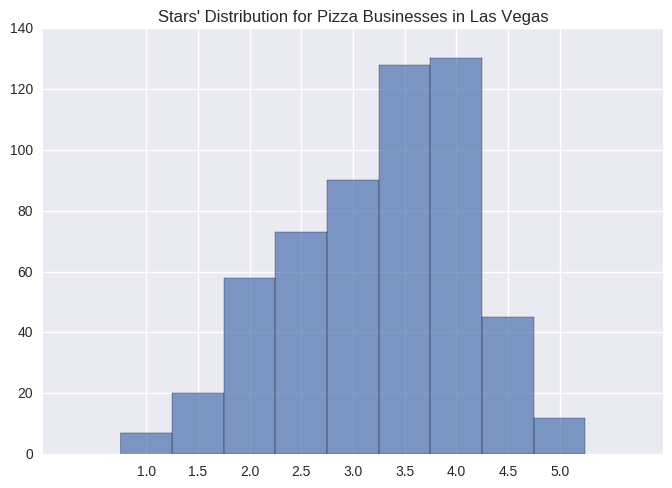

In [11]:
pizza_LV = pizza_businesses[pizza_businesses.city==city1]

n_total, bins, patch = plt.hist(pizza_LV.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for Pizza Businesses in Las Vegas")
plt.show()

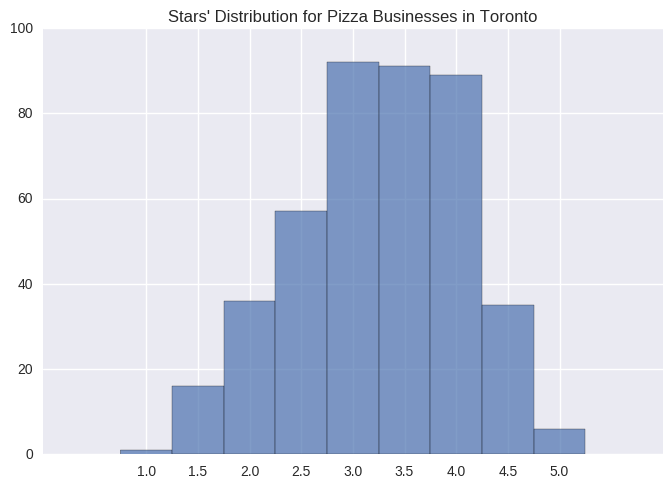

In [12]:
pizza_Toronto = pizza_businesses[pizza_businesses.city==city2]

n_total, bins, patch = plt.hist(pizza_Toronto.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for Pizza Businesses in Toronto")
plt.show()

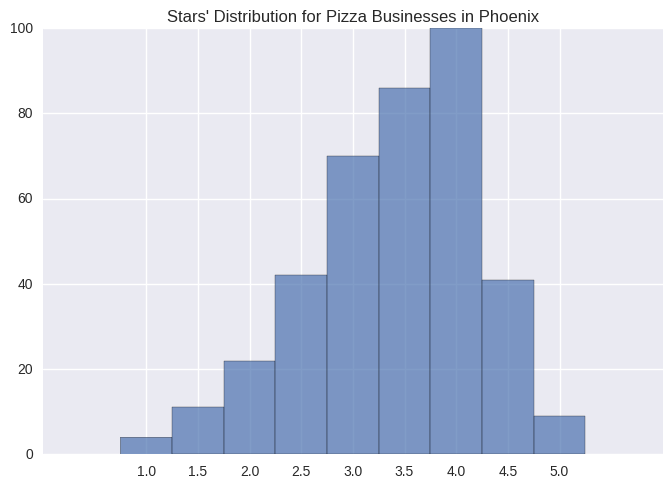

In [13]:
pizza_Phoenix = pizza_businesses[pizza_businesses.city==city3]

n_total, bins, patch = plt.hist(pizza_Phoenix.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for Pizza Businesses in Phoenix")
plt.show()

In [14]:
stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(pizza_LV.stars)),
                                     city2:list(scipy.stats.describe(pizza_Toronto.stars)),
                                     city3:list(scipy.stats.describe(pizza_Phoenix.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,563,385,423
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.2611,3.4026,3.2565
variance,0.7511,0.678639,0.656208
skewness,-0.375965,-0.536943,-0.262674
kurtosis,-0.466382,-0.0344979,-0.497478
